In [1]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

In [10]:
file_path_train = r"C:\Users\Baku\Desktop\bitirme_projesi\card_transdata_part1.csv"
file_path_test = r"C:\Users\Baku\Desktop\bitirme_projesi\card_transdata_part2.csv"

df_train = pd.read_csv(file_path_train)
df_test = pd.read_csv(file_path_test)

print("Train Data:")
display(df_train.head())

print("Test Data:")
display(df_test.head())

Train Data:


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.140066,-0.040371,-0.007094,0.0,0.0,0.0,-1.0,0.0
1,0.340434,-0.060406,0.076895,0.0,0.0,0.0,0.0,0.0
2,0.170465,-0.216944,0.843111,0.0,0.0,0.0,0.0,0.0
3,-0.201784,2.091104,-0.405236,0.0,0.0,0.0,0.0,0.0
4,-0.268973,0.175487,2.216640,0.0,1.0,0.0,0.0,1.0


Test Data:


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.646046,-0.325358,-0.484599,0.0,0.0,0.0,0.0,0.0
1,0.152285,-0.070651,1.915923,0.0,0.0,0.0,-1.0,0.0
2,0.153051,-0.000217,-0.190171,0.0,1.0,0.0,0.0,0.0
3,1.756235,-0.013002,-0.182981,0.0,0.0,0.0,0.0,0.0
4,1.002051,-0.249926,-0.307625,0.0,0.0,0.0,-1.0,0.0


In [3]:
# Separate features and target
X_train = df_train.drop("fraud", axis=1)
y_train = df_train["fraud"]
X_test = df_test.drop("fraud", axis=1)
y_test = df_test["fraud"]

# Standardize feature values
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [4]:
# Check class distribution before SMOTE
# print("Class distribution before SMOTE:")
# print(y_train.value_counts())

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# print("\nClass distribution after SMOTE:")
# print(y_train_resampled.value_counts())

In [5]:
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, digits=4) 
roc_auc = roc_auc_score(y_test, y_pred_proba)


In [6]:
# Results
print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"ROC AUC Score: {roc_auc:.4f}")


Confusion Matrix:
[[425801  30498]
 [  2306  41395]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    456299
         1.0       0.57      0.95      0.72     43701

    accuracy                           0.93    500000
   macro avg       0.78      0.94      0.84    500000
weighted avg       0.96      0.93      0.94    500000

ROC AUC Score: 0.9793374219788473


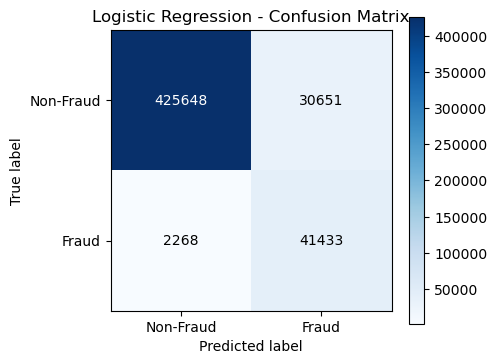

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix qur
cm = confusion_matrix(y_test, y_pred)
classes = ["Non-Fraud", "Fraud"]

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=classes,
    yticklabels=classes,
    ylabel="True label",
    xlabel="Predicted label",
    title="Logistic Regression - Confusion Matrix"
)

# Kvadratların içində rəqəmləri göstər
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.sshape[0]), range(cm.shape[1])):
    ax.text(j, i, format(cm[i, j], "d"),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


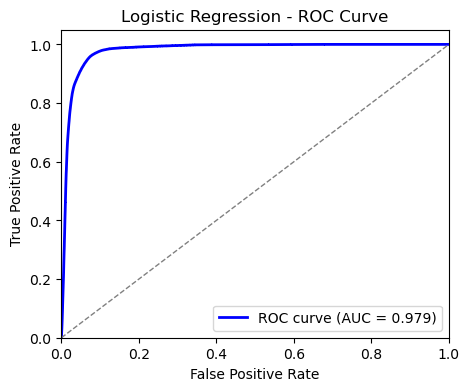

In [7]:
# Save confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
conf_matrix_df.to_csv("confusion_matrix.csv", index=True)

# Save classification report
report_df = pd.DataFrame(class_report).transpose()
report_df["roc_auc"] = ""
report_df.loc["avg / total", "roc_auc"] = roc_auc
report_df.to_csv("classification_report.csv", index=True)